In [1]:
ticker = "MANCHIN-24NOV06"

In [35]:
from pathlib import Path
import os
def load_env_vars_from_file(path: Path):
    file = path.read_text()
    for line in file.splitlines():
        if line.startswith("export"):
            var_to_value = line.split(" ")[1].split("=")
            var_ = var_to_value[0]
            value_ = var_to_value[1][1:-1]
            os.environ[var_] = value_
def set_up_prod_credentials():
    file = "../../../../scripts/prod_setup_creds.sh"
    load_env_vars_from_file(Path(file))
set_up_prod_credentials()

In [22]:
from exchange.interface import ExchangeInterface
from datetime import datetime


start = datetime(2024, 5, 30)
end = datetime(2024, 6, 2)
e = ExchangeInterface(is_test_run=False)
mh = e.get_market_history(ticker, start, end)

In [23]:
no_ask = [x.no_ask for x in mh]
yes_ask = [x.yes_ask for x in mh]
ts = [x.ts for x in mh]

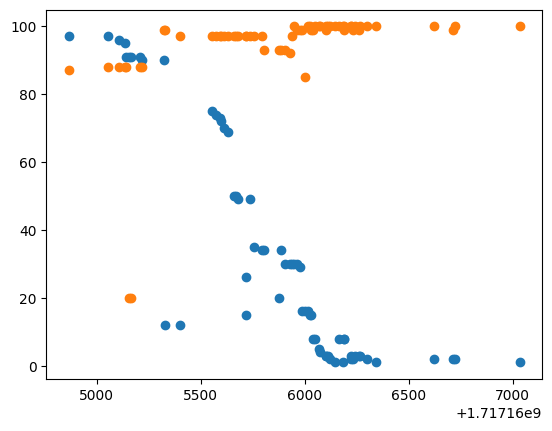

In [24]:
import matplotlib.pyplot as plt

skip_first = 2
skip_last = 50
plt.scatter(ts[skip_first:-1*skip_last], no_ask[skip_first:-1*skip_last])
plt.scatter(ts[skip_first:-1*skip_last], yes_ask[skip_first:-1*skip_last])

In [26]:
start = datetime(2024, 5, 30)
end = datetime(2024, 6, 2)
e = ExchangeInterface(is_test_run=False)
trades = list(e.get_trades(ticker, start, end))

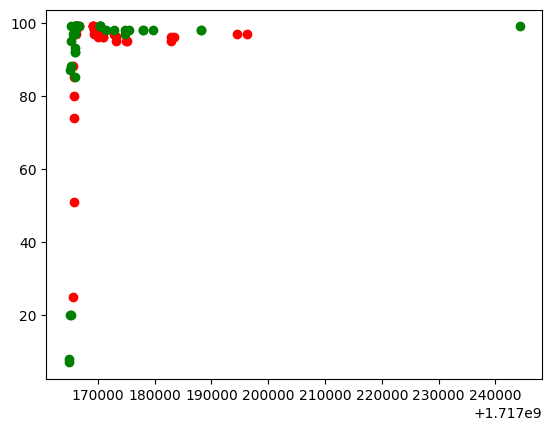

In [45]:
from helpers.types.orders import Side


yes_price_no_taker = [x.yes_price for x in trades if x.taker_side == Side.NO]
ts_no_taker = [x.created_time.timestamp() for x in trades if x.taker_side == Side.NO]

yes_price_yes_taker = [x.yes_price for x in trades if x.taker_side == Side.YES]
ts_yes_taker = [x.created_time.timestamp() for x in trades if x.taker_side == Side.YES]

skip_first = 1
skip_last = 1

plt.scatter(ts_no_taker[skip_first:-1*skip_last], yes_price_no_taker[skip_first:-1*skip_last], c='red')
plt.scatter(ts_yes_taker[skip_first:-1*skip_last], yes_price_yes_taker[skip_first:-1*skip_last], c='green')

In [20]:
def check_price_movement(df, P, S):
    return (len(df) > S) and ((max(df.yes_ask_price) - min(df.yes_ask_price) > P) or (max(df.yes_bid_price) - min (df.yes_bid_price) > P))

In [12]:
from strategy.utils import ColeDBInterface
all_tickers = []

db = ColeDBInterface()
e = ExchangeInterface(is_test_run=False)

total_markets_roughly = 70000
series_to_freq = {}
for series_ticker in db.get_series_tickers():
    for event_ticker in db.get_event_tickers(series_ticker):
        for market_ticker in db.get_market_tickers(event_ticker):
            all_tickers.append(market_ticker)
            

In [34]:
import multiprocess as mp

import more_itertools

chunks = list(more_itertools.chunked(all_tickers, len(all_tickers) // 7))
def check_this(tickers):
    assert len(tickers) == len(set(tickers))
    for ticker in tickers:
        if ticker.startswith("INX") or ticker.startswith("NASDAQ"):
            continue
        try:
            df = db.read_bbo_df(ticker).dropna()
            if check_price_movement(df, 30, 500):
                print(ticker)
        except:
            continue
    
num_processes = 8

# Create a pool of worker processes
with mp.Pool(processes=num_processes) as pool:
    # Map the function to a range of values in parallel
    results = pool.map(check_this, chunks)


FRMMAX-23DEC28-P7.6

FRMMAX-23DEC28-P7.8EURUSDH-24APR3010-T1.07139
FRMMAX-23DEC28-P8.0
EURUSDH-24APR3010-T1.07179
EURUSDH-24APR3010-T1.07059NETNEU-24-MAY31

EURUSDH-24APR0515-T1.08059
EURUSDH-24APR1111-T1.07079
EURUSDH-24APR0515-T1.08459
EURUSDH-24APR1111-T1.07159
EURUSDH-24APR1111-T1.07399
WEALTHY-24-MZ
EURUSDH-24APR1111-T1.07119
WEALTHY-24-EM
USDJPYH-24APR1210-T152.99900
EURUSDH-24APR0515-T1.08299
EURUSDH-24APR1111-T1.07279
WEALTHY-24-BA
USDJPYH-24MAY0115-T157.16900
EURUSDH-24APR1111-T1.07359
WEALTHY-24-JB
EURUSDH-24APR1111-T1.07199
TIKTOKBAN-25APR30
USDJPYH-24MAY0115-T157.02900
USDJPYH-24APR1210-T153.13900
EURUSDH-24APR1111-T1.07239
USDJPYH-24APR1210-T153.27900
USDJPYH-24MAY0115-T158.14900
EURUSDH-24APR0515-T1.08179
EURUSDMIN-23DEC29-T0.95
EURUSDH-24MAY0814-T1.07499
USDJPYH-24MAY0115-T157.58900
USDJPYH-24APR1210-T152.85900
USDJPYH-24MAY0115-T158.00900
EURUSDH-24MAY0814-T1.07419
EURUSDH-23SEP2210-T1.06400
USDJPYH-24MAY0612-T153.55900
EURUSDMIN-23DEC29-T1
EURUSDH-24MAY0814-T1.07539
EU

KeyboardInterrupt: 

In [29]:
df = db.read_bbo_df("RTJOKER2-69")

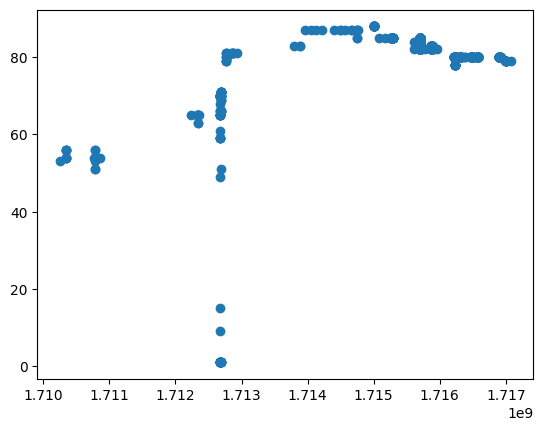

In [30]:
import matplotlib.pyplot as plt 
plt.scatter(df.ts, df.yes_bid_price)
plt.show()